In [1]:
%pip install --quiet pulp networkx tqdm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import copy

from pulp import LpProblem, LpVariable, LpMinimize, lpSum, LpStatus  # <-- PuLP
import networkx as nx
from tqdm import tqdm

In [3]:
influence = 0.2

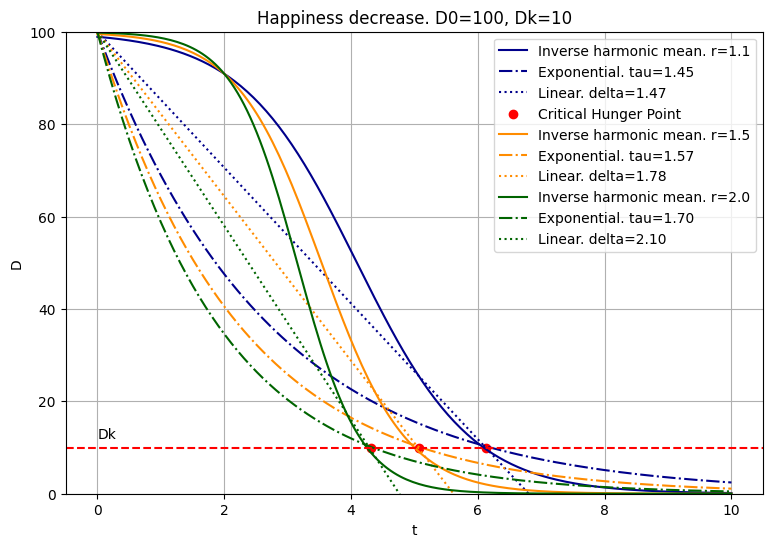

In [2]:
'''Нет большой разницы, потреблять благо линейно, экспоненциально или по
обратному среднему гармоническому. Всё дело в постоянных времени - от них
зависит, когда клиент достигнет критическогот голода.'''
t=np.linspace(-2,8,200)
te=t+2
D0, Dk = 100, 10
plt.figure(figsize=(9,6))
for r, tau, dt,c in zip([1.1,1.5,2.0],[1.45,1.57,1.7], [1.47,1.78,2.1],
                  ['darkblue', 'darkorange', 'darkgreen']):
    d=D0*Dk*np.exp(r*t)/(D0+Dk*np.exp(r*t))
    s=D0/(tau**(te))
    l=D0-dt*te*10
    plt.plot(te, D0-d, label='Inverse harmonic mean. r=%.1f'%r, c=c)
    plt.plot(te, s, label='Exponential. tau=%.2f'%tau, c=c, ls='-.')
    plt.plot(te, l, label='Linear. delta=%.2f'%dt, c=c, ls=':')
    i=np.where(l<=Dk)[0][0]
    plt.scatter(te[i],Dk, c='r', label='Critical Hunger Point' if c=='darkblue' else None )
plt.axhline(Dk, c='r', ls='--')
plt.xlabel('t')
plt.ylabel('D')
plt.text(0, Dk+2, 'Dk')
plt.title('Happiness decrease. D0=%i, Dk=%i'%(D0, Dk))
plt.ylim(0,D0)
plt.legend()
plt.grid()
plt.show()

In [3]:
'''скользящее среднее'''
def  MovingAverage(x, numb=10):
    n=len(x)//numb
    ma=list(x[:n])
    for j in range(len(x)-n):
        ma.append(np.mean(x[j:j+n]))
    return np.array(ma)

In [4]:
'''For pure fantasy'''
n=182
date=pd.date_range(start='2020-01-01', periods=n).strftime('%Y-%m-%d')
environment=pd.DataFrame({'date':date,
                          'crisis':np.zeros(n).astype(int),
                          'food':np.random.normal(1,0.02,n)*np.linspace(1,1.1,n),
                          'outfit':np.random.normal(1,0.01,n)*np.linspace(1,1.1,n),
                          'dwelling':np.random.normal(1,0.01,n)*np.linspace(1,1.1,n),
                          'health':np.random.normal(1,0.03,n)*np.linspace(1,1.1,n),
                          'remote':np.random.normal(1,0.03,n),
                          'travel':np.random.normal(1,0.03,n)+np.sin(np.linspace(0,np.pi/2,n))*.5-.5,
                          'nonfood':np.random.normal(1,0.01,n),
                          'telecom':np.random.normal(1,0.01,n),
                          'beauty':np.random.normal(1,0.02,n),
                          'kids':np.random.normal(1,0.01,n),
                          'fun':np.random.normal(1,0.03,n),
                          'charity':np.random.normal(1,0.03,n)})
crd=pd.date_range(start='2020-03-27', periods=50).strftime('%Y-%m-%d').to_list()
i=environment[environment.date==crd[0]].index[0]
environment.iloc[i:i+len(crd), 1]=1/(np.exp(np.linspace(-0.5,3,len(crd))**2))
for d in ['2020-05-06','2020-05-07','2020-05-08','2020-05-09','2020-01-01']:
    i=environment[environment.date==d].index
    environment.iloc[i, 1]=.5

/tmp/ipykernel_663698/1410863004.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7.78800783e-01 8.32207501e-01 8.80248504e-01 9.21610447e-01
 9.55119928e-01 9.79798674e-01 9.94910952e-01 1.00000000e+00
 9.94910952e-01 9.79798674e-01 9.55119928e-01 9.21610447e-01
 8.80248504e-01 8.32207501e-01 7.78800783e-01 7.21422290e-01
 6.61486763e-01 6.00373041e-01 5.39373532e-01 4.79652269e-01
 4.22213192e-01 3.67879441e-01 3.17283627e-01 2.70868328e-01
 2.28895481e-01 1.91462900e-01 1.58525988e-01 1.29922608e-01
 1.05399225e-01 8.46366615e-02 6.72741248e-02 5.29305019e-02
 4.12223164e-02 3.17780464e-02 2.42488095e-02 1.83156389e-02
 1.36937422e-02 1.01342274e-02 7.42382226e-03 5.38310574e-03
 3.86372920e-03 2.74504123e-03 1.93045414e-03 1.34381204e-03
 9.25946706e-04 6.31541477e-04 4.26369558e-04 2.84930489e-04
 1.88477747e-04 1.23409804e-04]' has dtype incompatible with int64, please explicitly cast to a com

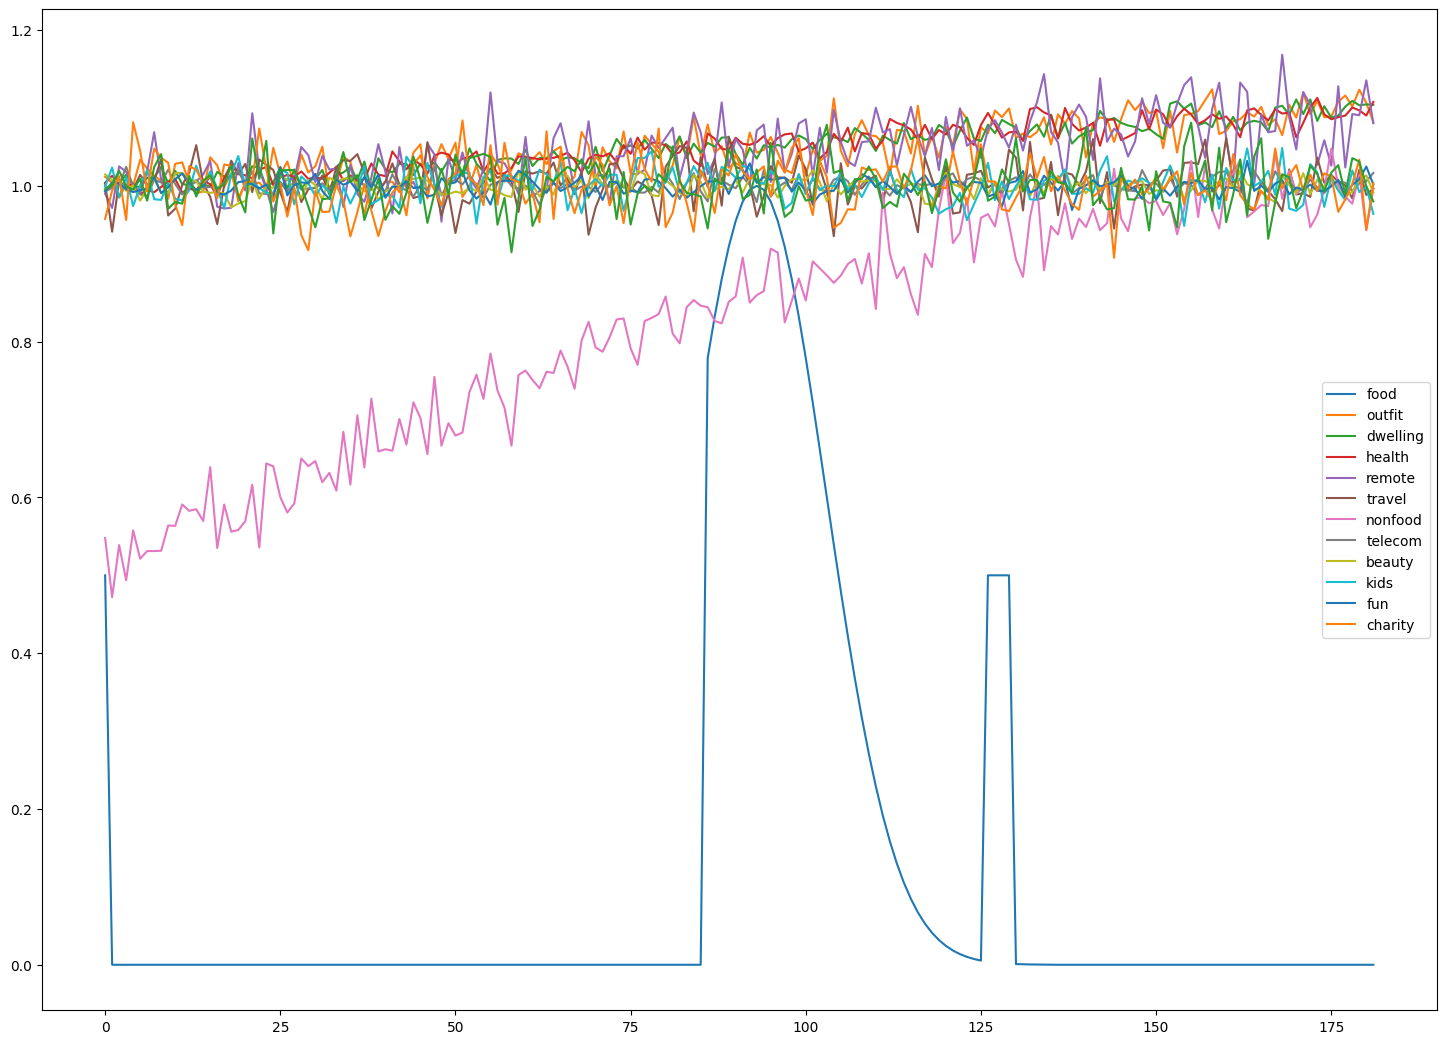

In [5]:
plt.figure(figsize=(18,13))
plt.plot(environment[environment.columns[1:]])
plt.legend(environment.columns[2:])
plt.show()

In [6]:
Fig = r'''     ,,,,,  
   Wо(0,0)о 
   |  \~/   
    \__|__  
     \ : / \ 
     (_._)  |
     | _ |  M
     || || 
   @_/   \_@ 
'''
print(Fig+'Hi! I\'m a simulated consumer!')

     ,,,,,  
   Wо(0,0)о 
   |  \~/   
    \__|__  
     \ : / \ 
     (_._)  |
     | _ |  M
     || || 
   @_/   \_@ 
Hi! I'm a simulated consumer!


In [7]:
import types
import pandas as pd

# базовая (средняя) цена: 100 у.е.
BASE_PRICE = 100

def df_get_price(self, cat, date, base=BASE_PRICE):
    """
    Возвращает price = base * коэффициент_из_DataFrame[cat, date].
    • self — сам DataFrame (environment)
    • cat  — строка-категория ('food', 'travel', …)
    • date — pd.Timestamp или datetime/строка
    """
    date_str = pd.Timestamp(date).strftime('%Y-%m-%d')
    coeff    = self.loc[self['date'] == date_str, cat].iloc[0]
    return base * coeff

def get_crisis(self, date):
    row = self[self['date'] == date.strftime('%Y-%m-%d')]
    if not row.empty:
        return float(row['crisis'].values[0])
    return 0.0

# Привязываем метод к environment
environment.get_crisis = types.MethodType(get_crisis, environment)
environment.get_price = types.MethodType(df_get_price, environment)

In [8]:
# --- транспортная надбавка ---
def travel_cost(xy, k: float = 0.1):
    """
    xy  – координаты агента (x, y)
    k   – стоимость 1 км пути
    Центр (склад/магазин) считаем в точке (50, 50).
    """
    if xy is None:
        return 0.0

    dx, dy = xy[0] - 50, xy[1] - 50
    dist = (dx**2 + dy**2) ** 0.5  # Евклидово расстояние
    return k * dist

In [43]:
import logging
from pulp import LpProblem, LpVariable, LpMinimize, lpSum, LpStatus, PULP_CBC_CMD
import numpy as np
import pandas as pd
import copy

for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(level=logging.INFO, format='%(message)s')
logger = logging.getLogger(__name__)

class customer:
    def __init__(self, idx: int, start_date, props: dict, env, graph=None, xy=None, inf=0, enable_logging=False):
        self.idx = idx
        self.day = 0
        self.date = pd.Timestamp(start_date)
        self.xy = xy
        self.env = env
        self.enable_logging = enable_logging

        for k, v in props.items():
            setattr(self, k, copy.deepcopy(v))

        self.categories = props['category_list']

        self.sum = np.array(self.sum_arr, dtype=float)
        self.tau = np.array(self.tau_arr, dtype=float)
        self.limit = np.array(self.limit_arr, dtype=float)
        self.importance = np.array(self.importance, dtype=float)

        self.influence = inf
        self.graph = graph
        self.last_purchase = np.zeros_like(self.importance)
        self.all_agents = None

        self.strategy = props.get('strategy', 'rationalist')
        self.strategy_mods = get_strat(self.strategy)

    def _log(self, message):
        if self.enable_logging:
            logger.info(message)

    def time_step(self):
        crisis = self.env.get_crisis(self.date) if hasattr(self.env, 'get_crisis') else 0

        decay_noise = np.random.normal(1.0, 0.03, size=len(self.sum))
        adjusted_tau = np.maximum(
            self.tau + np.array([self.strategy_mods.get(cat, 0) for cat in self.categories]) * crisis,
            0.1
        )
        decay_rate = np.clip(1 / (adjusted_tau * decay_noise), 0, 1)
        self.sum *= decay_rate

        deficits_info = self._get_deficits_info()
        date_str = self.date.strftime("%Y-%m-%d")

        if deficits_info:
            stats_str = ", ".join(x[1] for x in deficits_info)
            self._log(f"[{date_str}] Category deficits before purchase: {stats_str}")
        else:
            self._log(f"[{date_str}] No category deficits before purchase.")

        needs = [cat for idx, cat in enumerate(self.categories) if self.sum[idx] < self.limit[idx]]

        # Обновление wealth с кризисным коэффициентом
        if self.day % 15 == 0:
            #salcoef = 0.7 if crisis > 0.01 else 1.0
            self.wealth += self.salary #* salcoef

        # Обновление importance через соседей раз в неделю
        if (self.day % 7 == 0) and self.graph is not None:
            neigh = list(self.graph.neighbors(self.idx))
            if neigh:
                peer_mean = np.mean([self.all_agents[j].last_purchase for j in neigh], axis=0)
                self.importance = (1 - self.influence) * self.importance + self.influence * peer_mean

        purchases = {}
        if needs and self.wealth > 1:
            purchases = self.market(needs, crisis)
            if purchases:
                purchases.pop('_fallback', None)
                spend_vec = np.zeros_like(self.importance)
                for cat, amt in purchases.items():
                    cid = self.categories.index(cat)
                    self.sum[cid] += amt
                    price = self.env.get_price(cat, self.date)
                    self.wealth -= amt * price
                    spend_vec[cid] = amt
                self.last_purchase = spend_vec

                summary = ", ".join(f"{cat}={amt:.2f}" for cat, amt in purchases.items())
                self._log(f"[{date_str}] Purchases: {summary}")
                self._log(f"[{date_str}] Wealth left: {self.wealth:.2f}")

        self.day += 1
        self.date += pd.Timedelta(days=1)
        return purchases if purchases else None

    def _get_deficits_info(self):
        deficits_info = [
            (limit - current, f"{cat}: {current:.2f}/{limit:.2f} (deficit: {limit - current:.2f})")
            for i, (cat, current, limit) in enumerate(zip(self.categories, self.sum, self.limit))
            if current < limit
        ]
        return sorted(deficits_info, key=lambda x: x[0], reverse=True)

    def market(self, needs, crisis, min_cover=0.1, budget_share=0.5, max_categories=5,
               enforce_min_cover=True, extra_fraction=0.5):

        if not needs or self.wealth <= 1.0:
            return None

        idxs = [self.categories.index(cat) for cat in needs]
        prices = [self.env.get_price(cat, self.date) for cat in needs]
        importance = self.importance[idxs]
        limits = self.limit[idxs]
        stocks = self.sum[idxs]
        taus = self.tau[idxs]

        deficits = np.maximum(0, limits - stocks)
        if not np.any(deficits):
            return None

        alpha = 1.5
        needs_scored = [
            (needs[i], deficits[i], prices[i], importance[i], limits[i],
             (deficits[i] / limits[i]) ** alpha * (importance[i] + 1) / taus[i] if limits[i] > 0 else 0)
            for i in range(len(needs)) if deficits[i] > 0
        ]

        selected_needs = sorted(needs_scored, key=lambda x: x[5], reverse=True)[:max_categories]

        prob = LpProblem("ConsumerSpend", LpMinimize)
        x = [LpVariable(f'x_{i}', lowBound=0) for i in range(len(selected_needs))]

        # Целевая функция — максимизация score (минус для LpMinimize)
        prob += lpSum([-selected_needs[i][5] * x[i] for i in range(len(selected_needs))])

        max_budget = self.wealth * budget_share
        prob += lpSum([selected_needs[i][2] * x[i] for i in range(len(selected_needs))]) <= max_budget

        for i, (_, deficit, _, _, limit, _) in enumerate(selected_needs):
            random_extra = np.random.uniform(extra_fraction / 2, extra_fraction) * limit
            prob += x[i] <= deficit + random_extra

        if enforce_min_cover:
            total_min_cost = sum(min_cover * deficit * price for (_, deficit, price, _, _, _) in selected_needs)
            adjusted_min_cover = min_cover
            if total_min_cost > max_budget:
                sum_def_price = sum(deficit * price for (_, deficit, price, _, _, _) in selected_needs)
                adjusted_min_cover = max_budget / sum_def_price if sum_def_price > 0 else 0
                self._log(f"Adjusted min_cover from {min_cover} to {adjusted_min_cover:.3f} due to budget constraints")

            for i, (_, deficit, _, _, _, _) in enumerate(selected_needs):
                min_amount = adjusted_min_cover * deficit
                if min_amount > 0:
                    prob += x[i] >= min_amount

        status = prob.solve(PULP_CBC_CMD(msg=0))

        if LpStatus[status] != "Optimal":
            self._log("Fallback triggered due to non-optimal LP solution.")
            fallback_budget = min(self.wealth * 0.3, max_budget)
            total_deficit = sum(deficit for (_, deficit, _, _, _, _) in selected_needs)
            result = {}

            for cat, deficit, price, _, _, _ in selected_needs:
                share = deficit / total_deficit if total_deficit > 0 else 0
                spend = fallback_budget * share
                if spend > 0:
                    amt = min(spend / price, deficit)
                    result[cat] = amt

            if result:
                result['_fallback'] = True
                return result
            else:
                return None

        raw_result = {selected_needs[i][0]: x[i].varValue
                      for i in range(len(selected_needs))
                      if x[i].varValue and x[i].varValue > 0}

        total_spent = sum(selected_needs[i][2] * raw_result.get(selected_needs[i][0], 0) for i in range(len(selected_needs)))
        if total_spent <= 0:
            return None

        return raw_result

In [25]:
def get_strat(strategy):
    """Возвращает словарь с поправками к tau и лимитам бюджета для стратегии."""
    strategies = {
        'ascetic': {
            'tau_mods': {
                'food': 1.1, 'outfit': -0.1, 'dwelling': 0.1, 'health': -0.3,
                'remote': 0.3, 'travel': 0, 'nonfood': -0.5, 'telecom': -0.2,
                'beauty': 0.1, 'kids': 0.2, 'fun': 0.3, 'charity': 0.1
            },
            'budget_limit': 0.05
        },
        'investor': {
            'tau_mods': {
                'food': 0.7, 'outfit': 0.5, 'dwelling': 0, 'health': 0.7,
                'remote': 0.8, 'travel': 0, 'nonfood': 0.2, 'telecom': 0.5,
                'beauty': 0.6, 'kids': -0.1, 'fun': -0.1, 'charity': -0.1
            },
            'budget_limit': 0.15
        },
        'strategist': {
            'tau_mods': {
                'food': 0.4, 'outfit': 0.1, 'dwelling': -0.2, 'health': 0,
                'remote': 0.4, 'travel': 0, 'nonfood': 0.1, 'telecom': 0.5,
                'beauty': -0.1, 'kids': 0.3, 'fun': -0.3, 'charity': 0.1
            },
            'budget_limit': 0.10
        },
        'alarmist': {
            'tau_mods': {
                'food': 0.8, 'outfit': 0.8, 'dwelling': -0.3, 'health': 0.5,
                'remote': 0.3, 'travel': 0, 'nonfood': 0.1, 'telecom': 0.5,
                'beauty': 0.1, 'kids': 0.5, 'fun': 0.1, 'charity': 0.1
            },
            'budget_limit': 0.07
        },
        'rationalist': {
            'tau_mods': {
                'food': 0.7, 'outfit': 0, 'dwelling': 0, 'health': 0,
                'remote': 0, 'travel': 0, 'nonfood': -0.3, 'telecom': 0.2,
                'beauty': 0, 'kids': 0, 'fun': -0.2, 'charity': 0
            },
            'budget_limit': 0.10
        }
    }
    return strategies.get(strategy, strategies['rationalist'])


def init_properties():
    proper0 = {
        'wealth': 200000,
        'salary': 300000,
        'food': {'sum': 12000, 'tau': 1.8, 'limit': 500, 'importance': 9, 'predictability': 1},
        'outfit': {'sum': 10000, 'tau': 1.05, 'limit': 1000, 'importance': 4, 'predictability': 1},
        'dwelling': {'sum': 10000, 'tau': 1.02, 'limit': 1000, 'importance': 3, 'predictability': 2},
        'health': {'sum': 5000, 'tau': 1.1, 'limit': 1000, 'importance': 8, 'predictability': 2},
        'remote': {'sum': 5000, 'tau': 1.05, 'limit': 700, 'importance': 3, 'predictability': 3},
        'travel': {'sum': 5000, 'tau': 1.07, 'limit': 1000, 'importance': 7, 'predictability': 3},
        'nonfood': {'sum': 3000, 'tau': 1.05, 'limit': 500, 'importance': 4, 'predictability': 9},
        'telecom': {'sum': 500, 'tau': 1.07, 'limit': 300, 'importance': 4, 'predictability': 1},
        'beauty': {'sum': 5000, 'tau': 1.05, 'limit': 500, 'importance': 3, 'predictability': 1},
        'kids': {'sum': 5000, 'tau': 1.07, 'limit': 1000, 'importance': 7, 'predictability': 2},
        'fun': {'sum': 10000, 'tau': 1.6, 'limit': 300, 'importance': 8, 'predictability': 5},
        'charity': {'sum': 1000, 'tau': 1.001, 'limit': 100, 'importance': 2, 'predictability': 9},
        'strategy': 'rationalist',
        'satisfaction': 100
    }
    return proper0


def adjust_props(prp):
    cats = [
        'food', 'outfit', 'dwelling', 'health',
        'remote', 'travel', 'nonfood', 'telecom',
        'beauty', 'kids', 'fun', 'charity'
    ]

    predvariance = [0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9]

    strategies = ['ascetic', 'investor', 'strategist', 'alarmist', 'rationalist']
    probs = [0.1, 0.2, 0.2, 0.1, 0.4]
    strategy = np.random.choice(strategies, p=probs)
    strat_info = get_strat(strategy)
    tau_mods = strat_info['tau_mods']

    props = copy.deepcopy(prp)
    scale = 1 / (1 + abs(np.random.standard_cauchy()))

    props['salary'] *= scale
    props['wealth'] *= scale
    props['strategy'] = strategy
    props['budget_limit'] = strat_info.get('budget_limit', 0.1)
    props['strategy_mods'] = tau_mods

    for c in cats:
        props[c]['sum'] *= scale
        props[c]['tau'] *= np.random.normal(1.0, 0.01)
        props[c]['tau'] += tau_mods.get(c, 0)
        props[c]['limit'] *= scale / 3
        props[c]['importance'] += np.random.randint(
            low=-props[c]['importance'] + 1,
            high=props[c]['importance']
        )
        props[c]['importance'] = max(1, props[c]['importance'])  # не меньше 1
        props[c]['predictability'] = np.random.choice(predvariance)

    # Векторизация
    props['category_list'] = cats
    props['importance'] = np.array([props[c]['importance'] for c in cats])
    props['tau_arr'] = np.array([props[c]['tau'] for c in cats])
    props['limit_arr'] = np.array([props[c]['limit'] for c in cats])
    props['sum_arr'] = np.array([props[c]['sum'] for c in cats])
    props['predictability_arr'] = np.array([props[c]['predictability'] for c in cats])

    return props

In [11]:
def live_period(c1, prt=False):
    global environment

    if prt:
        Fig = r'''          ,,,,,  
        Wо(0,0)о 
        |  \~/   
         \__|__  
          \ : / \ 
          (_._)  |
          | _ |  M
          || || 
        @_/   \_@ 
        '''
        print(Fig+'Hi! I\'m a simulated consumer!')

    records = []
    wealth = []
    satisfaction = []

    n_days = len(environment) - 1 if isinstance(environment, pd.DataFrame) else 182

    for _ in range(n_days):
        purchases = c1.time_step()

        if purchases:
            current_date = c1.date - pd.Timedelta(days=1)  # Покупка относится к предыдущему дню
            if prt:
                print(current_date.strftime('%d.%m.%y') +
                      f': Wealth = {c1.wealth:.2f}  Bought:', end=' ')
                for cat, amt in purchases.items():
                    print(f'{cat}:{amt:.2f}', end=' ')
                print()

            for cat, amt in purchases.items():
                records.append({
                    'id': c1.idx,
                    'date': current_date,
                    'category': cat,
                    'amt': round(amt, 2)
                })

        wealth.append(c1.wealth)
        satisfaction.append(getattr(c1, 'satisfaction', np.nan))

    db = pd.DataFrame(records, columns=['id', 'date', 'category', 'amt'])
    return db

In [12]:
proper0 = init_properties()
print("Ключи init_properties  →", proper0.keys())

props_test = adjust_props(proper0)
print("Ключи adjust_props     →", props_test.keys())
print("importance пример      →", props_test.get("importance", None))

Ключи init_properties  → dict_keys(['wealth', 'salary', 'food', 'outfit', 'dwelling', 'health', 'remote', 'travel', 'nonfood', 'telecom', 'beauty', 'kids', 'fun', 'charity', 'strategy', 'satisfaction'])
Ключи adjust_props     → dict_keys(['wealth', 'salary', 'food', 'outfit', 'dwelling', 'health', 'remote', 'travel', 'nonfood', 'telecom', 'beauty', 'kids', 'fun', 'charity', 'strategy', 'satisfaction', 'budget_limit', 'strategy_mods', 'category_list', 'importance', 'tau_arr', 'limit_arr', 'sum_arr', 'predictability_arr'])
importance пример      → [13  6  3 12  2  6  5  7  4  2  5  1]


In [44]:
"""For a single customer"""
proper0 = init_properties()

c1 = customer('customer',
              environment.date.min(),
              adjust_props(proper0),
              env=environment,
              enable_logging=True)

print("c1.date =", c1.date, "| type =", type(c1.date))

db = live_period(c1)

print("Wealth %.2f; Salary %.2f" % (c1.wealth / 1000, c1.salary / 1000))

[2020-01-01] No category deficits before purchase.
[2020-01-02] No category deficits before purchase.
[2020-01-03] No category deficits before purchase.
[2020-01-04] Category deficits before purchase: telecom: 62.64/88.10 (deficit: 25.46)
[2020-01-04] Purchases: telecom=56.07
[2020-01-04] Wealth left: 434935.11
[2020-01-05] Category deficits before purchase: telecom: 71.07/88.10 (deficit: 17.03)
[2020-01-05] Purchases: telecom=49.18
[2020-01-05] Wealth left: 430014.24
[2020-01-06] Category deficits before purchase: food: 101.44/146.84 (deficit: 45.39), telecom: 78.15/88.10 (deficit: 9.95)
[2020-01-06] Purchases: food=86.65, telecom=47.54
[2020-01-06] Wealth left: 416395.83
[2020-01-07] Category deficits before purchase: food: 82.95/146.84 (deficit: 63.89), telecom: 80.79/88.10 (deficit: 7.31)
[2020-01-07] Purchases: food=113.12, telecom=40.18
[2020-01-07] Wealth left: 400829.53
[2020-01-08] Category deficits before purchase: food: 83.54/146.84 (deficit: 63.29), telecom: 80.92/88.10 (de

c1.date = 2020-01-01 00:00:00 | type = <class 'pandas._libs.tslibs.timestamps.Timestamp'>


[2020-02-04] Purchases: food=48.26, telecom=62.33, fun=2.44, kids=7.23, nonfood=2.82
[2020-02-04] Wealth left: 12546.85
[2020-02-05] Category deficits before purchase: kids: 168.67/293.67 (deficit: 125.00), food: 64.06/146.84 (deficit: 82.78), remote: 128.15/205.57 (deficit: 77.42), health: 243.07/293.67 (deficit: 50.60), nonfood: 107.99/146.84 (deficit: 38.84), fun: 50.21/88.10 (deficit: 37.89), outfit: 262.74/293.67 (deficit: 30.93), telecom: 75.16/88.10 (deficit: 12.94), charity: 26.42/29.37 (deficit: 2.95)
[2020-02-05] Purchases: food=8.28, fun=30.42, health=5.06, kids=12.50, remote=7.74
[2020-02-05] Wealth left: 6273.42
[2020-02-06] Category deficits before purchase: kids: 128.47/293.67 (deficit: 165.20), remote: 90.89/205.57 (deficit: 114.68), food: 33.47/146.84 (deficit: 113.36), health: 210.78/293.67 (deficit: 82.89), outfit: 231.86/293.67 (deficit: 61.81), nonfood: 94.05/146.84 (deficit: 52.78), telecom: 48.92/88.10 (deficit: 39.18), fun: 62.30/88.10 (deficit: 25.80), charity:

Wealth 132.16; Salary 264.30


In [ ]:
agents = []
G = nx.watts_strogatz_graph(20, k=4, p=0.1)

for i in range(20):
    props = adjust_props(init_properties())
    ag = customer(i, pd.Timestamp("2020-01-01"), props, graph=G, env=environment)  # <-- фикс
    agents.append(ag)

In [ ]:
def random_coords(n, side=100, seed=None):
    rng = np.random.default_rng(seed)
    x = rng.uniform(0, side, size=n)
    y = rng.uniform(0, side, size=n)
    return np.column_stack([x, y])  # shape (n, 2)

In [ ]:
xy = random_coords(20, side=100, seed=42)  # создаём координаты
G = nx.watts_strogatz_graph(20, k=4, p=0.1)

agents = []
for i in range(20):
    props = adjust_props(init_properties())
    ag = customer(i, pd.Timestamp("2020-01-01"), props, graph=G, env=environment)
    ag.xy = xy[i]  # 🔧 ОБЯЗАТЕЛЬНО: задать координаты
    agents.append(ag)

for ag in agents:
    ag.all_agents = agents


In [ ]:
records = []
print("type(records) ПЕРЕД циклом:", type(records))

for ag in tqdm(agents):
    df_agent = live_period(ag)   # функция возвращает DataFrame по одному агенту
    records.append(df_agent)     # мы добавляем его в список

db = pd.concat(records, ignore_index=True)  # объединяем список в один DataFrame

print("Кол-во строк в db:", len(db))
print(db.head())

type(records) ПЕРЕД циклом: <class 'list'>


100%|██████████| 20/20 [00:34<00:00,  1.73s/it]

Кол-во строк в db: 307
   id       date category     amt
0   0 2020-01-02   health  269.30
1   0 2020-01-02   travel   80.16
2   0 2020-01-02  nonfood   37.55
3   0 2020-01-02      fun   65.66
4   0 2020-01-02  charity   21.89


In [32]:
print("Кол-во строк в db:", len(db))
print(db.head())
print(db['amt'].describe())

Кол-во строк в db: 882
         id       date category    amt
0  customer 2020-01-04  telecom  26.20
1  customer 2020-01-05     food  50.19
2  customer 2020-01-05  telecom  26.74
3  customer 2020-01-06     food  94.09
4  customer 2020-01-06  telecom  26.96
count    882.000000
mean      27.553810
std       53.805473
min        0.010000
25%        0.170000
50%        1.700000
75%       24.410000
max      311.160000
Name: amt, dtype: float64


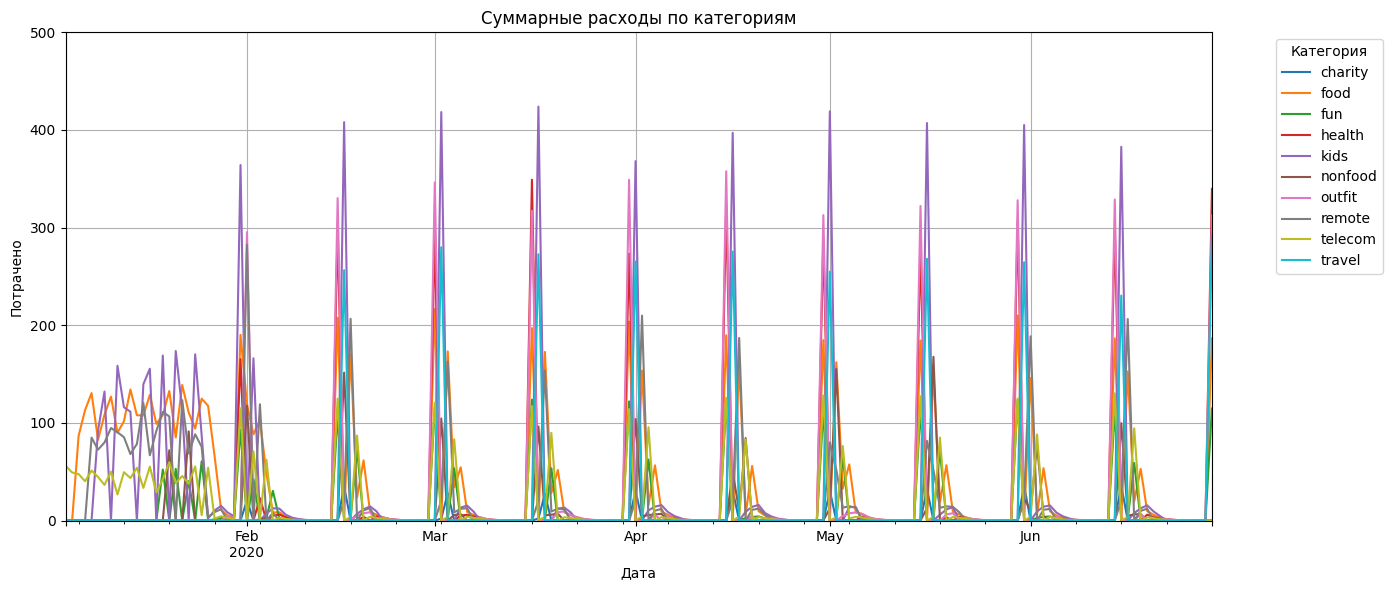

In [47]:
# Группируем данные: сумма по (дата, категория)
pivot = db.pivot_table(index="date", columns="category", values="amt", aggfunc="sum", fill_value=0)

# Строим график
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
pivot.plot(ax=plt.gca())
plt.title("Суммарные расходы по категориям")
plt.ylabel("Потрачено")
plt.xlabel("Дата")
plt.ylim(0, 500)
plt.grid(True)
plt.legend(title="Категория", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

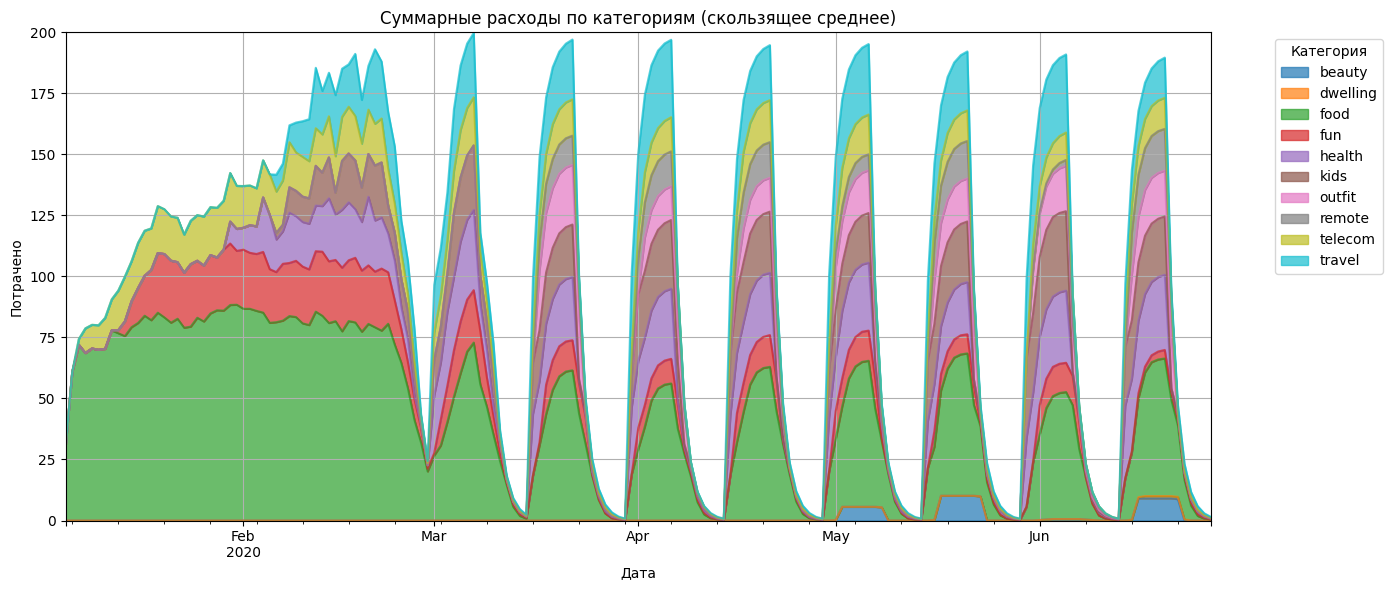

In [292]:
# Группируем данные: сумма по (дата, категория)
pivot = db.pivot_table(index="date", columns="category", values="amt", aggfunc="sum", fill_value=0)

# Обрезаем последние 2 дня, чтобы убрать резкий шип
pivot = pivot.iloc[:-2]

# Применим сглаживание по 7-дневному окну
pivot_smooth = pivot.rolling(window=7, min_periods=1).mean()

# Строим stacked area график
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
pivot_smooth.plot(kind='area', stacked=True, figsize=(14, 6), alpha=0.7)

plt.title("Суммарные расходы по категориям (скользящее среднее)")
plt.ylabel("Потрачено")
plt.xlabel("Дата")
plt.ylim(0, 200)
plt.grid(True)
plt.legend(title="Категория", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

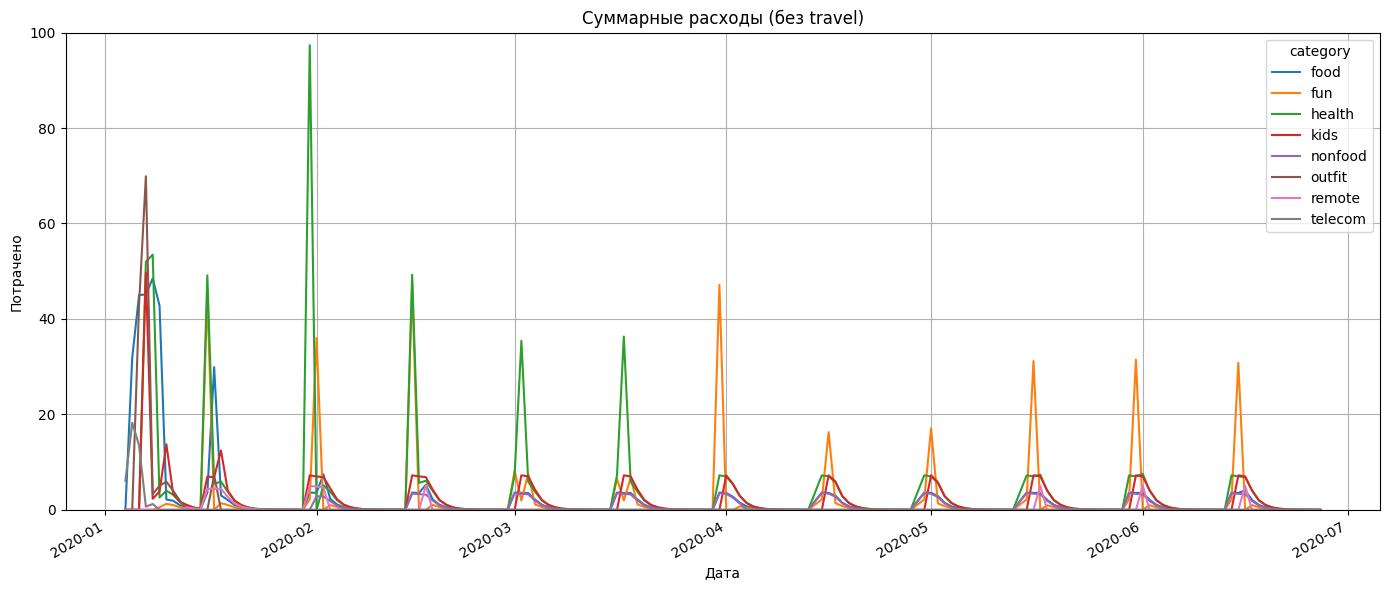

In [254]:
plt.figure(figsize=(14, 6))

(pivot
   .drop(columns='travel')
   .plot(ax=plt.gca()))

plt.title("Суммарные расходы (без travel)")
plt.ylabel("Потрачено")
plt.xlabel("Дата")
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
influence = 0.0            # ← соседей игнорируем
G_none    = None           # граф не передаём

agents0, rec0 = [], []
for i in range(20):
    ag = customer(i, pd.Timestamp("2020-01-01"),
                  adjust_props(init_properties()),
                  env=environment,
                  graph=G_none)
    agents0.append(ag)
    rec0.append(live_period(ag))

db0 = pd.concat(rec0, ignore_index=True)   # «до»

In [ ]:
influence = 0.2
G = nx.watts_strogatz_graph(20, k=4, p=0.1, seed=42)

agents1 = []
for i in range(20):
    ag = customer(
        i,
        pd.Timestamp("2020-01-01"),
        adjust_props(init_properties()),
        env=environment,
        graph=G
    )
    agents1.append(ag)

# раздаём ссылку на общий список
for ag in agents1:
    ag.all_agents = agents1

#  теперь можно вызывать live_period
rec1 = [live_period(ag) for ag in agents1]

db1 = pd.concat(rec1, ignore_index=True)


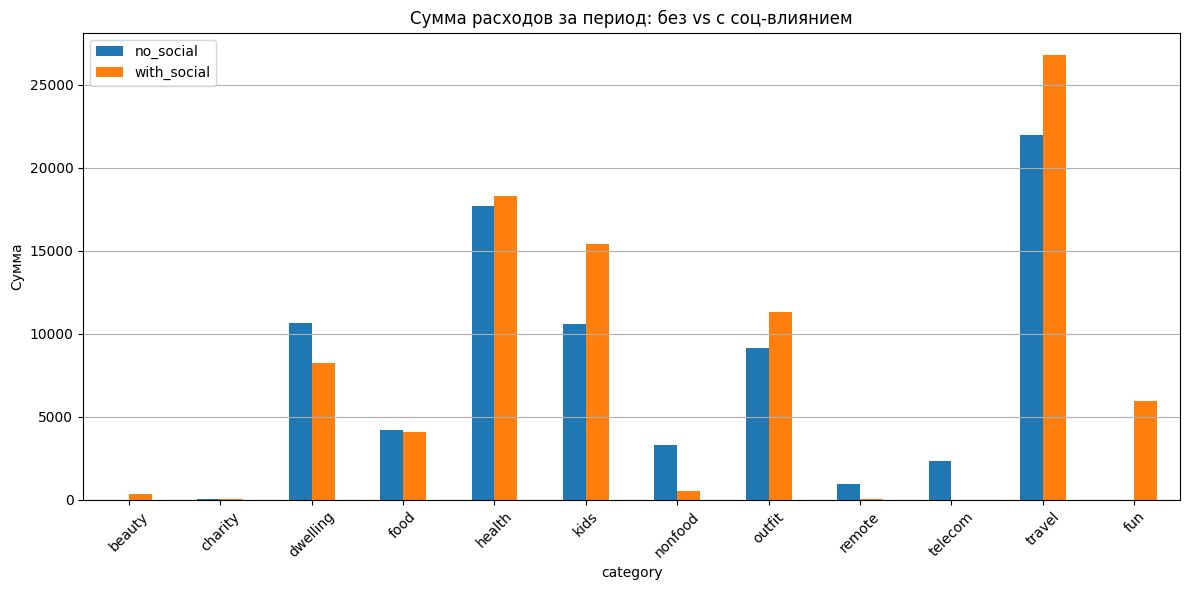

In [ ]:
def summary(df):
    return (df.groupby('category')['amt']
              .sum()
              .sort_index())          # Series длиной 12

s0 = summary(db0)
s1 = summary(db1)

pd.concat([s0.rename('no_social'),
           s1.rename('with_social')], axis=1) \
  .plot.bar(figsize=(12,6))
plt.title("Сумма расходов за период: без vs c соц-влиянием")
plt.ylabel("Сумма")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [256]:
def run_sim(n_agents=300, infl=0.2, seed=0):
    rng  = np.random.default_rng(seed)
    G    = nx.watts_strogatz_graph(n_agents, k=6, p=0.1, seed=seed)

    global influence         # даст time_step() доступ к коэффициенту
    influence = infl

    # ---------- 1. создаём всех агентов --------------------------
    agents = []
    for i in range(n_agents):
        props = adjust_props(init_properties())
        ag    = customer(i, pd.Timestamp("2020-01-01"), props, env=environment, graph=G)
        agents.append(ag)

    # ---------- 2. даём каждому ссылку на общий список ----------
    for ag in agents:
        ag.all_agents = agents

    # ---------- 3. крутим жизнь и собираем покупки --------------
    rec = []
    for ag in agents:
        rec.append(live_period(ag))     # live_period уже не содержит .append()

    return pd.concat(rec, ignore_index=True)

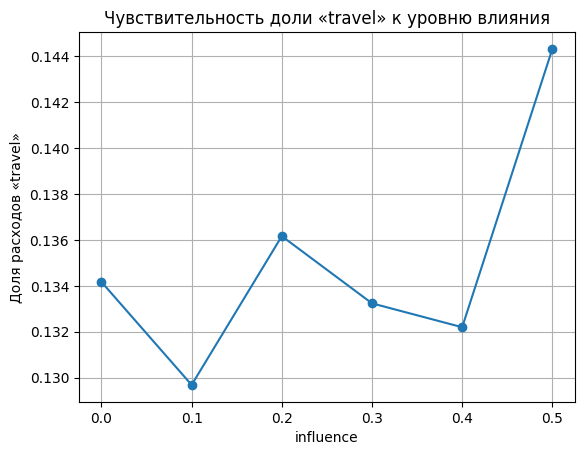

In [ ]:
infl_values = np.linspace(0, 0.5, 6)   # 0.0 ··· 0.5
results = {}

for α in infl_values:
    db_i = run_sim(n_agents=300, infl=α, seed=42)
    share_travel = (db_i.loc[db_i.category=='travel','amt'].sum()
                    / db_i['amt'].sum())
    results[α] = share_travel

plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xlabel("influence"); plt.ylabel("Доля расходов «travel»")
plt.title("Чувствительность доли «travel» к уровню влияния")
plt.grid(True); plt.show()

Модель чувствительна к уровню социального влияния (influence).

- При низком влиянии — агенты ведут себя индивидуально.

- При influence ≈ 0.1–0.2 — наблюдается рост эффекта подражания.

- При высоком влиянии — эффект нелинейный, возможна стабилизация.

Вывод: Социальное давление способно существенно менять структуру потребления.

**География**

(Колумб Америку открыл,

страну для нас совсем чужую...

Чудак, он лучше бы открыл

На нашей улице пивную)


In [49]:
from concurrent.futures import ThreadPoolExecutor
import pandas as pd

def run_sim_parallel(n_agents=300, infl=0.2, seed=0, max_workers=8):
    rng = np.random.default_rng(seed)
    G = nx.watts_strogatz_graph(n_agents, k=6, p=0.1, seed=seed)

    global influence
    influence = infl

    agents = []
    for i in range(n_agents):
        props = adjust_props(init_properties())
        ag = customer(i, pd.Timestamp("2020-01-01"), props, env=environment, graph=G, inf=infl)
        agents.append(ag)

    for ag in agents:
        ag.all_agents = agents

    rec = []
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        results = executor.map(live_period, agents)
        rec = list(results)

    return pd.concat(rec, ignore_index=True)


In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Запускаем симуляцию для 800 агентов
db = run_sim_parallel(n_agents=800, infl=0.2, seed=42, max_workers=32)  # seed можно поставить любой для воспроизводимости

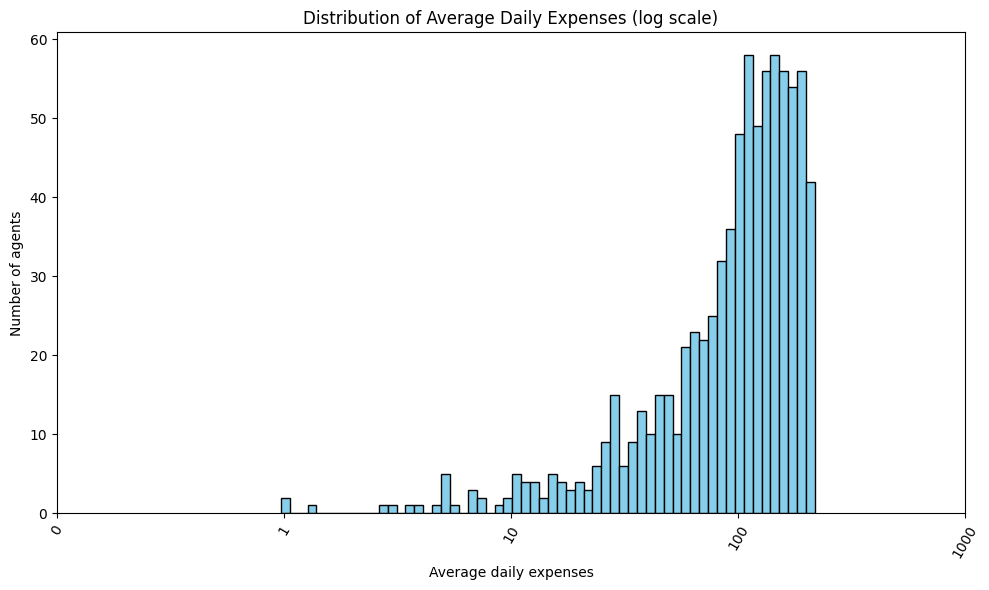

Mean log10 daily expenses: 1.94 ± 0.360


In [51]:
# Фильтрация по дате, если нужно (можно убрать или изменить)
beg, end = '2020-01-01', '2020-06-30'
dperiod = db[(db['date'] >= beg) & (db['date'] <= end)].copy()

# Считаем суммарные расходы по агенту и дате
daily_expenses = dperiod.groupby(['id', 'date'])['amt'].sum().reset_index()

# Средние дневные расходы по каждому агенту
avg_daily_expenses = daily_expenses.groupby('id')['amt'].mean()

# Логарифмируем, чтобы распределение лучше смотрелось
avg_daily_expenses_log = np.log10(avg_daily_expenses + 1e-3)  # небольшой сдвиг чтобы избежать log(0)

# Строим гистограмму
plt.figure(figsize=(10,6))
plt.hist(avg_daily_expenses_log, bins=60, color='skyblue', edgecolor='black')

# Настраиваем подписи на оси X с натуральными значениями
ticks = np.arange(int(np.floor(avg_daily_expenses_log.min())), int(np.ceil(avg_daily_expenses_log.max())) + 1)
ticks_float = ticks.astype(float)  # обязательно float для отрицательных степеней
plt.xticks(ticks, (10 ** ticks_float).astype(int), rotation=60)

plt.xlabel('Average daily expenses')
plt.ylabel('Number of agents')
plt.title('Distribution of Average Daily Expenses (log scale)')

plt.tight_layout()
plt.show()

print(f'Mean log10 daily expenses: {avg_daily_expenses_log.mean():.2f} ± {avg_daily_expenses_log.std():.3f}')

In [ ]:
def random_coords(n, side=100, seed=None):
    rng = np.random.default_rng(seed)
    x = rng.uniform(0, side, size=n)
    y = rng.uniform(0, side, size=n)
    return np.column_stack([x, y])  # shape (n,2)

In [ ]:
n_agents = 300  # или другое количество агентов
seed = 42       # для воспроизводимости
xy = random_coords(n_agents, side=100, seed=seed)
G = nx.random_geometric_graph(n_agents, radius=15,
                              pos={i: xy[i] for i in range(n_agents)})

# ---------- 1. создаём список агентов ----------
agents_xy = []
for i in range(n_agents):
    props = adjust_props(init_properties())          # твои функции
    ag = customer(
        idx   = i,
        start_date = pd.Timestamp("2020-01-01"),
        props = props,
        env = environment,
        graph = G,
        xy = xy[i] # ← координаты
    )
    agents_xy.append(ag)

# ---------- 2. раздаём ссылку на общий список ----------
for ag in agents_xy:
    ag.all_agents = agents_xy    # нужно для peer-influence

# ---------- 3. запускаем симуляцию ----------
rec_xy = [live_period(ag) for ag in tqdm(agents_xy)]
db  = pd.concat(rec_xy, ignore_index=True)

# db теперь содержит все покупки всех агентов + координаты учтены в travel_cost
print("Строк в db:", len(db))
print(db.head())


100%|██████████| 300/300 [07:05<00:00,  1.42s/it]

Строк в db: 4564
   id       date category    amt
0   0 2020-01-02   remote  19.62
1   0 2020-01-02   travel  47.25
2   0 2020-01-02  nonfood  11.52
3   0 2020-01-02      fun  48.20
4   0 2020-01-02  charity   2.35


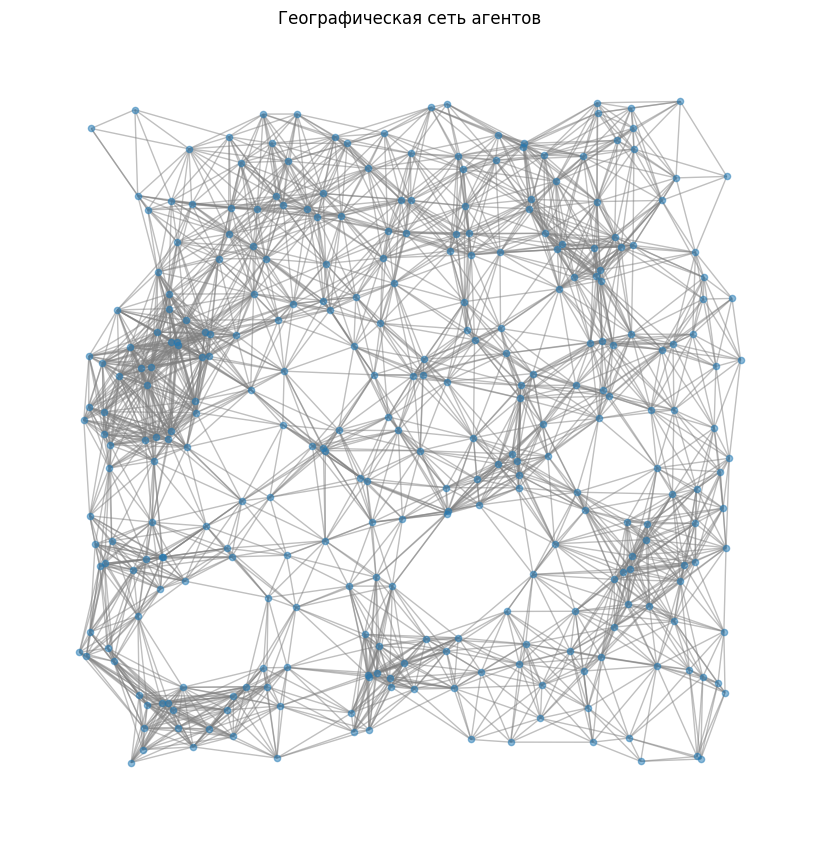

In [ ]:
pos = {i: xy[i] for i in range(n_agents)}
plt.figure(figsize=(8,8))
nx.draw(G, pos, node_size=20, edge_color='gray', alpha=0.5)
plt.title("Географическая сеть агентов")
plt.xlabel("x (км)"); plt.ylabel("y (км)")
plt.grid(True); plt.show()

In [ ]:
db.groupby('id')['amt'].sum().describe()

,amt
count,1.00
mean,1231.74
std,NaN
min,1231.74
25%,1231.74
50%,1231.74
75%,1231.74
max,1231.74


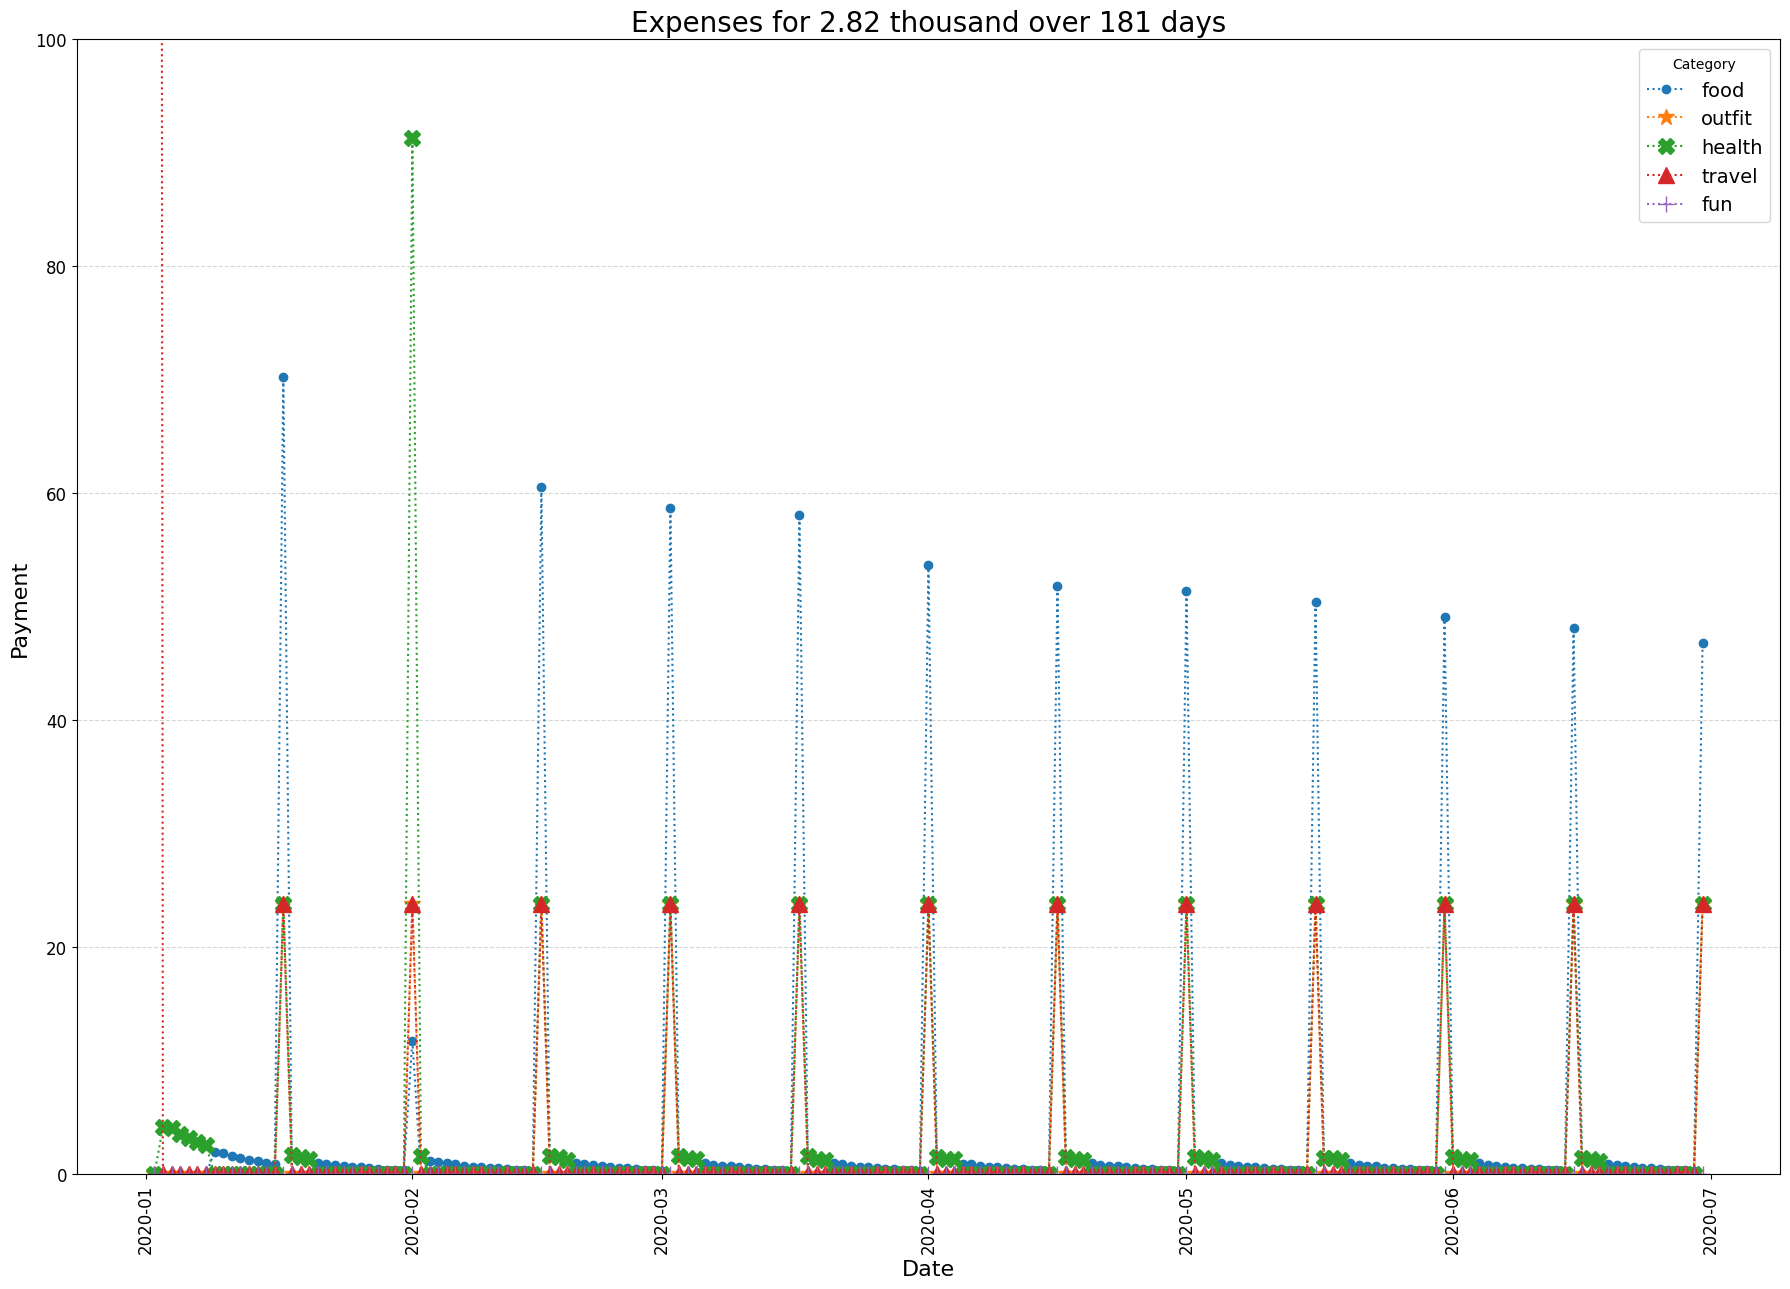

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Категории и маркеры
gtgs = ['food', 'outfit', 'health', 'travel', 'fun']
markers = ['.', '*', 'X', '^', '+', 'o']

# Получаем все уникальные даты из DataFrame
all_dates = pd.date_range(start=db["date"].min(), end=db["date"].max())

# Общая сумма трат для заголовка
s = db["amt"].sum()

# Рисуем график
plt.figure(figsize=(18, 13))

for i, cat in enumerate(gtgs):
    # Делаем таблицу с полной датой и данными по категории
    catdb = pd.merge(
        pd.DataFrame({'date': all_dates}),
        db[db["category"] == cat][['date', 'amt']],
        on='date',
        how='left'
    ).fillna(0.0)

    # Строим график
    plt.plot(catdb['date'], catdb['amt'], marker=markers[i], markersize=12,
             linestyle=':', label=cat)

# Заголовок и оформление
plt.title(f'Expenses for {s / 1000:.2f} thousand over {len(all_dates)} days', size=20)
plt.xlabel('Date', size=16)
plt.ylabel('Payment', size=16)
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(fontsize=14, title="Category")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [ ]:
print("строк в db:", len(db))
print(db.head())               # первые 5 строк
print(db['amt'].describe())    # краткая статистика
print("число ненулевых amt:", (db['amt'] != 0).sum())

строк в db: 782
   id       date  category    amt
0   0 2020-01-02  dwelling  14.03
1   0 2020-01-02   nonfood  15.10
2   0 2020-01-02    beauty  21.02
3   0 2020-01-02      kids   1.59
4   0 2020-01-02       fun  32.01
count    782.000000
mean     102.328465
std       84.455160
min        0.150000
25%       32.172500
50%       79.930000
75%      156.377500
max      589.400000
Name: amt, dtype: float64
число ненулевых amt: 782


(array([  1.,   0.,   0.,   4.,   4.,   8.,  21.,  42.,  88., 132.]),
 array([-0.89159812, -0.29129376,  0.3090106 ,  0.90931496,  1.50961932,
         2.10992368,  2.71022804,  3.3105324 ,  3.91083675,  4.51114111,
         5.11144547]),
 <BarContainer object of 10 artists>)

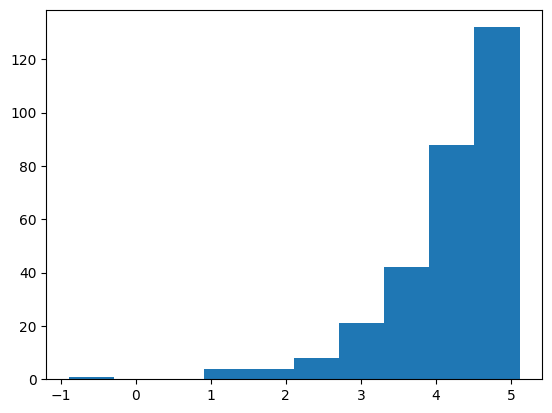

In [ ]:
a=db[db.category=='food'].amt.values
plt.hist(np.log(a))

food outfit dwelling health beauty remote travel kids nonfood telecom fun charity 
0.02986321094312455


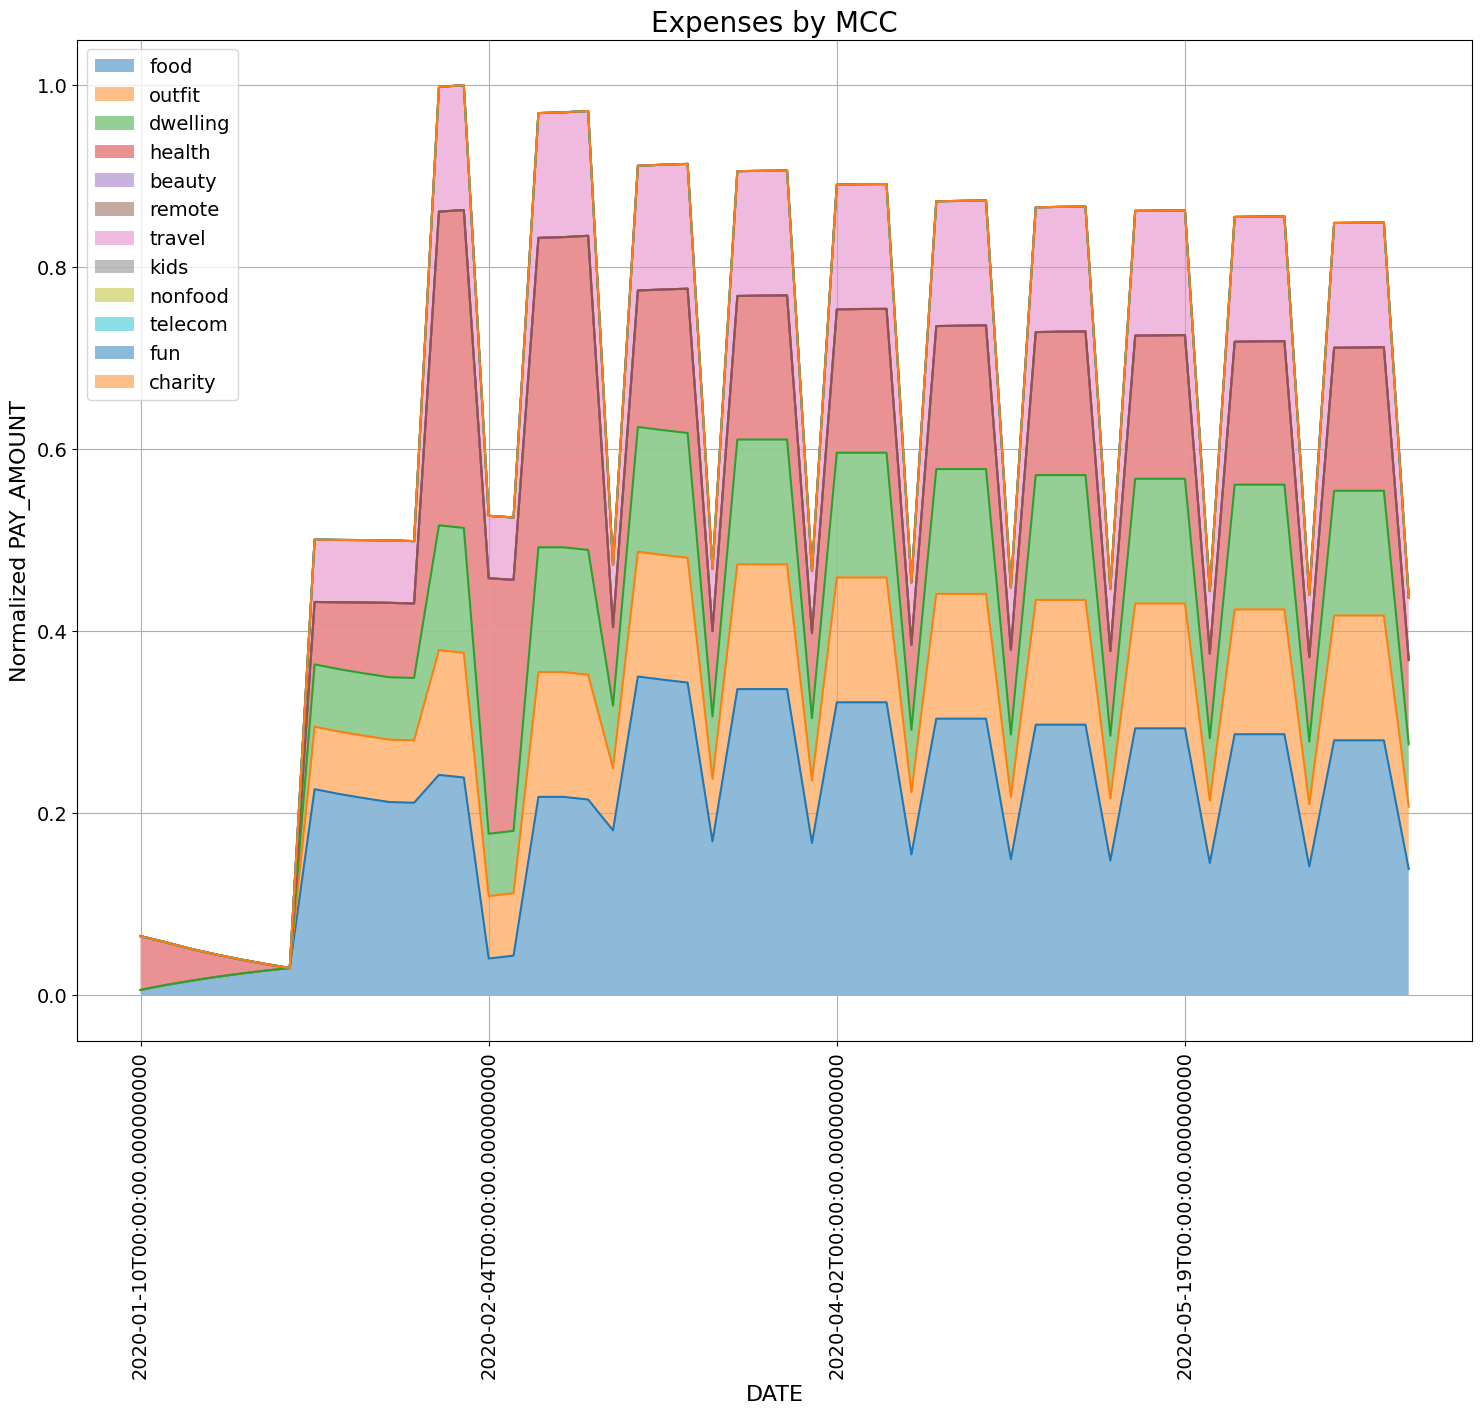

In [ ]:
"""Population exploring"""
def make_ams(data):
    ams=pd.DataFrame()
    ams['date']=data['date'].unique()
    for v in vallab:
        print(v, end=' ')
        dm=data[data.category==v]
        amounts=dm.groupby('date')['amt'].sum()
        a=pd.DataFrame(amounts).rename(columns = {'amt': v})
        ams=pd.merge(ams, a, how="outer", on='date')
    ams.fillna(value=0., inplace=True)
    print('')
    ams['s']=[sum(ams.iloc[i,1:]) for i in ams.index]
    ams=ams.drop(ams[ams.s<1.].index)
    ams=ams.drop('s', axis=1)
    ams.sort_values(by='date', inplace=True)
    ams=ams.reset_index()
    ams=ams.drop('index', axis=1)
    return ams

def smoothing(amn):
    amsmooth=pd.DataFrame()
    amsmooth['date']=amn.date.values
    for i in amn.columns[1:]:
        amsmooth[i]=MovingAverage(amn[i].values, numb=len(amn)//7)
    amsmooth=amsmooth.drop(amsmooth[:8].index)
    amsmooth=amsmooth.reset_index().drop('index', axis=1)
    return amsmooth

def draw1(ams, tit=''):
    k=np.arange(1, len(ams.columns))
    scale=max([ams.iloc[j,k].sum() for j in ams.index])
    plt.figure(figsize=(18,13))
    plt.title('Expenses by MCC'+tit, size=20)
    ser=np.zeros(len(ams))
    for i in ams.columns[1:]:
        s1=ser.copy()
        ser+=ams[i].values/scale
        plt.plot(ser)
        plt.fill_between(np.arange(len(ser)), s1, ser, alpha=.5, label=i)
    print(min(ser))
    xt=np.arange(0, len(ams), 14)
    plt.xticks(xt, ams.date.values[xt], size=14, rotation=90)
    plt.yticks(size=14)
    plt.xlabel('DATE', size=16)
    plt.ylabel('Normalized PAY_AMOUNT', size=16)
    plt.legend(fontsize=14)
    plt.grid(axis='both')
    plt.show()
    return None

def draw2(ams, tit=''):
    k=np.arange(1, len(ams.columns))
    plt.figure(figsize=(18,13))
    plt.title('Expenses by MCC'+tit, size=20)
    s={}
    for i in ams.columns[1:]: # 6536,
        s[i]=[]
        for j in ams.index:
            scale=ams.iloc[j,k].sum()
            s[i].append(ams[j:j+1][i].values[0]/scale)
    ser=np.zeros(len(ams))
    for i in ams.columns[1:]:
        s1=ser.copy()
        ser+=s[i] #Norm01(ams[i].values)[0]
        plt.plot(ser)
        plt.fill_between(np.arange(len(ser)), s1, ser, alpha=.5, label=i)
    xt=np.arange(0, len(ams),14)
    plt.xticks(xt, ams.date.values[xt], size=14, rotation=90)
    plt.yticks(size=14)
    plt.xlabel('DATE', size=16)
    plt.ylabel('RELATIVE PAY_AMOUNT', size=16)
    plt.legend(fontsize=14)
    plt.grid(axis='x')
    plt.show()
    return None
#val=[food, outfit, dwelling, health, beauty, remote, money, travel, kids, nonfood, telecom, fun, charity, misc]
vallab=['food', 'outfit', 'dwelling', 'health','beauty', 'remote', 'travel', 'kids', 'nonfood',
        'telecom', 'fun', 'charity']#, 'misc'
amn=make_ams(db)
amn=smoothing(amn)#[len(amn)//2:]
draw1(amn, tit='')

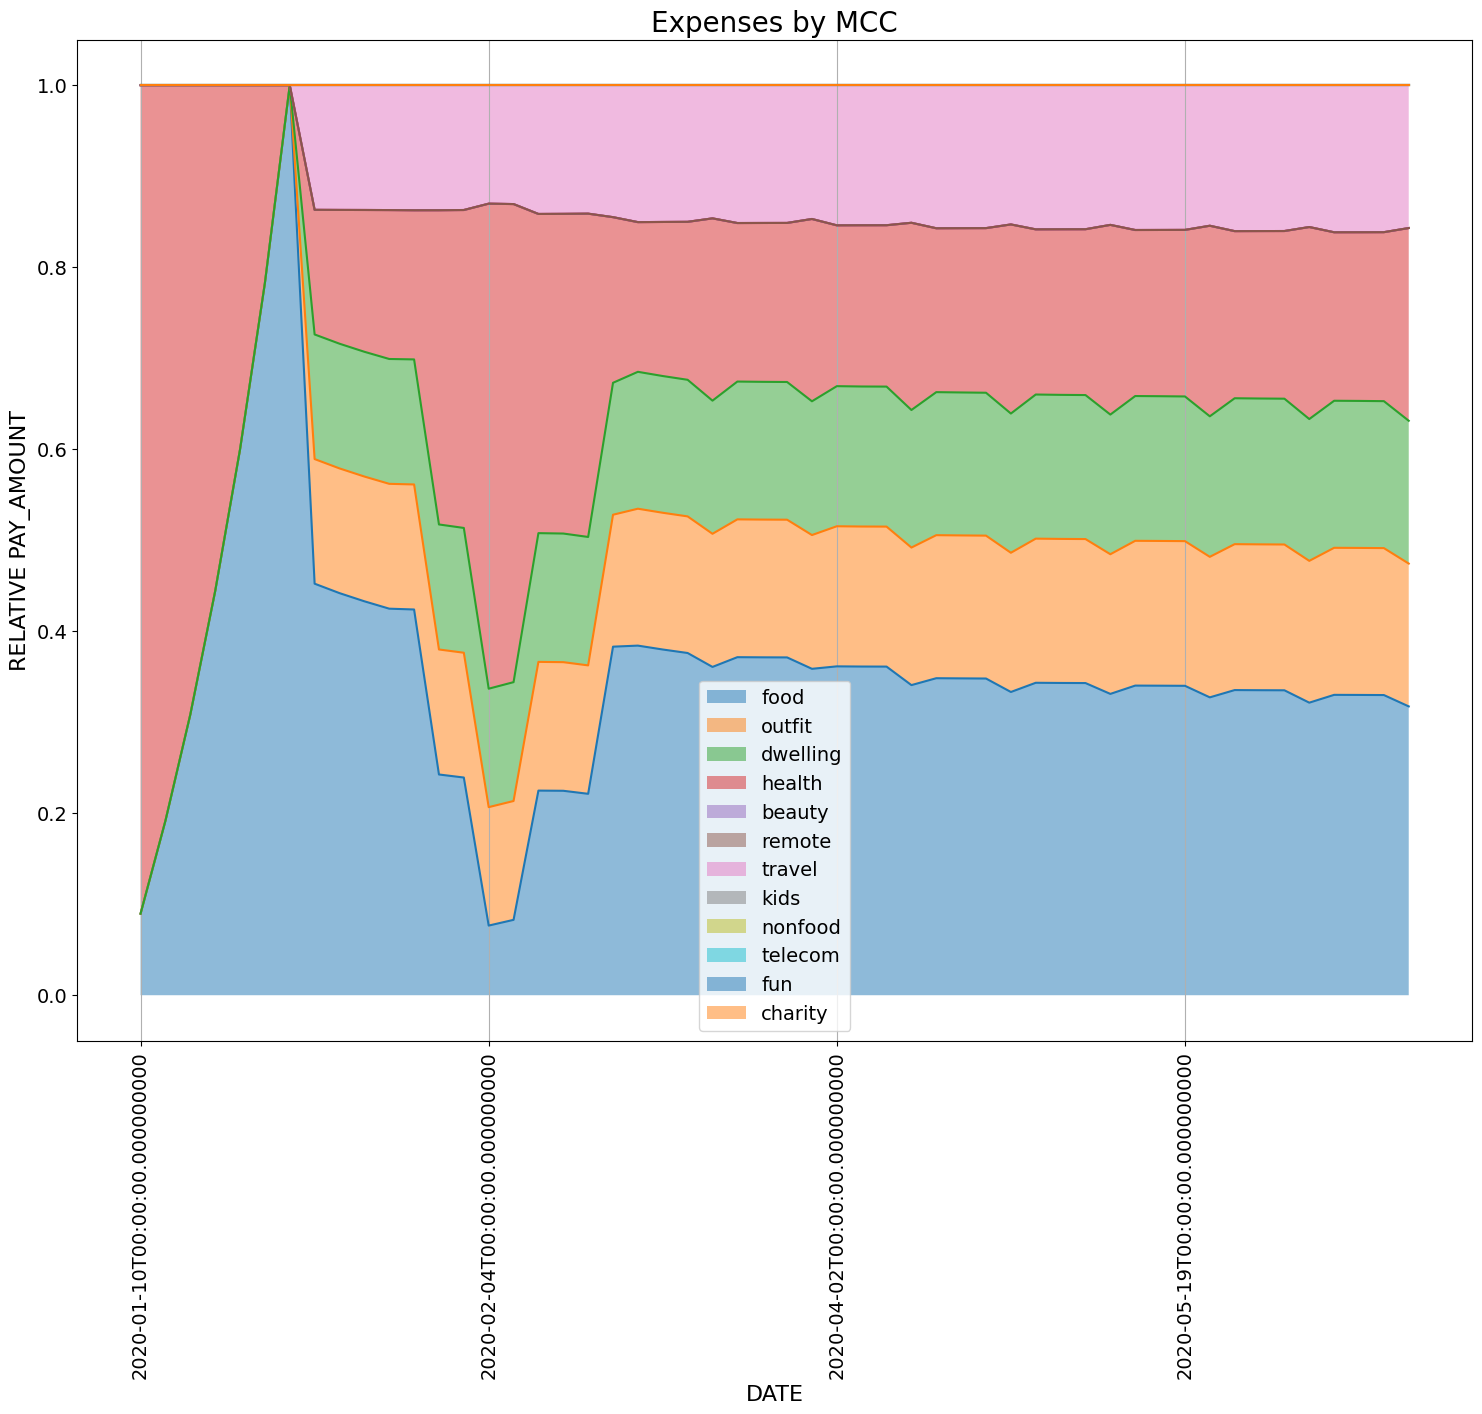

In [ ]:
draw2(amn, tit='')

In [ ]:
db.to_csv('simulated1000.csv', index=False)